## Step 1: Import required packages

In [37]:
# import numpy package for arrays and stuff
import numpy as np
from sklearn.model_selection import train_test_split

# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt

# import pandas for importing csv files
import pandas as pd
from sklearn import tree

## Step 2: Initialize and print the dataset

In [38]:
# import dataset
dataset = pd.read_excel('dataModel.xlsx')
# print the dataset
print(dataset)


              Airline Airline Type     Region  Year  \
0     AirTran Airways        Other   Domestic  1995   
1     AirTran Airways        Other   Domestic  1996   
2     AirTran Airways        Other   Domestic  1997   
3     AirTran Airways        Other   Domestic  1998   
4     AirTran Airways        Other   Domestic  1999   
...               ...          ...        ...   ...   
1412       US Airways        Other      Total  2011   
1413       US Airways        Other      Total  2012   
1414       US Airways        Other      Total  2013   
1415       US Airways        Other      Total  2014   
1416       US Airways        Other      Total  2015   

      Aircraft Expense Percentage  ASM Percentage  \
0                             0.0             1.0   
1                             0.0             1.0   
2                             0.0             1.0   
3                             1.0             1.0   
4                             1.0             1.0   
...                  

## Step 3: Select all the rows and column 1 from the dataset to "x"

In [39]:
# select all features
X = dataset[['Airline','Airline Type','Region','Aircraft Expense Percentage','ASM Percentage',
             'CASM Aircraft Operations - Expenses / ASM','Pax Rev Percentage','RASM - Pax Revenue / ASM',
             'RPM Percentage','Sum of Aircraft Expense','Sum of ASM','Sum of Pax Rev','Sum of RPM',
             'Yield - Pax Revenue / RPM']]
# print X
X


,Airline,Airline Type,Region,Aircraft Expense Percentage,ASM Percentage,CASM Aircraft Operations - Expenses / ASM,Pax Rev Percentage,RASM - Pax Revenue / ASM,RPM Percentage,Sum of Aircraft Expense,Sum of ASM,Sum of Pax Rev,Sum of RPM,Yield - Pax Revenue / RPM
0,AirTran Airways,Other,Domestic,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,114722000,0.00,59282000,0.000000
1,AirTran Airways,Other,Domestic,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,1467192000,0.00,934265000,0.000000
2,AirTran Airways,Other,Domestic,0.0,1.0,0.000000,1.0,0.071849,1.0,0.00,1412731000,101502.94,931120000,0.109012
3,AirTran Airways,Other,Domestic,1.0,1.0,0.033404,1.0,0.074778,1.0,153794.65,4604090000,344285.94,2652028000,0.129820
4,AirTran Airways,Other,Domestic,1.0,1.0,0.043116,1.0,0.083696,1.0,250612.90,5812531000,486487.16,3587907000,0.135591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,US Airways,Other,Total,0.0,0.0,0.081679,0.0,0.115185,0.0,5929723.48,72597944496,8362201.75,60774184366,0.137595
1413,US Airways,Other,Total,0.0,0.0,0.081352,0.0,0.119141,0.0,6036690.06,74204276983,8840780.17,62429604698,0.141612
1414,US Airways,Other,Total,0.0,0.0,0.077708,0.0,0.122108,0.0,6052748.26,77890881718,9511090.08,66159811488,0.143759
1415,US Airways,Other,Total,0.0,0.0,0.076564,0.0,0.124604,0.0,6118420.96,79912567417,9957443.61,66301395090,0.150185


## Step 4: Select all of the rows and column 2 from the dataset to "y"

In [40]:
# select target variable
y = dataset['Load Factor']
y

0       0.516745
1       0.636771
2       0.659092
3       0.576016
4       0.617271
          ...   
1412    0.837134
1413    0.841321
1414    0.849391
1415    0.829674
1416    0.830751
Name: Load Factor, Length: 1417, dtype: float64

## Step 5: Fit decision tree regressor to the dataset

In [41]:
#identify categorical variable
def cat_var_checker(df, dtype='object'):
    """
    The categorical variable checker

    Parameters
    ----------
    df : the dataframe
    dtype : the data type categorical variables should have, 'object' by default
            i.e., if a variable has this data type, it should be a categorical variable
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           # If the data type is dtype
                           for var in df.columns if df[var].dtype == dtype],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [42]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(X)

# Print the dataframe
df_cat

,var,nunique
0,Airline,15
1,Region,6
2,Airline Type,4


In [43]:
# One-hot-encode the categorical features in the combined data
X = pd.get_dummies(X, columns=np.setdiff1d(np.intersect1d(X.columns, df_cat['var']), ['Load Factor']))

# Print the first 5 rows of df
X.head()

,Aircraft Expense Percentage,ASM Percentage,CASM Aircraft Operations - Expenses / ASM,Pax Rev Percentage,RASM - Pax Revenue / ASM,RPM Percentage,Sum of Aircraft Expense,Sum of ASM,Sum of Pax Rev,Sum of RPM,...,Airline Type_Network Carriers,Airline Type_Other,Airline Type_Ultra-Low-Cost Carriers,Airline Type_Value Carriers,Region_ Atlantic,Region_ Domestic,Region_ International,Region_ Latin America,Region_ Pacific,Region_ Total
0,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,114722000,0.00,59282000,...,0,1,0,0,0,1,0,0,0,0
1,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,1467192000,0.00,934265000,...,0,1,0,0,0,1,0,0,0,0
2,0.0,1.0,0.000000,1.0,0.071849,1.0,0.00,1412731000,101502.94,931120000,...,0,1,0,0,0,1,0,0,0,0
3,1.0,1.0,0.033404,1.0,0.074778,1.0,153794.65,4604090000,344285.94,2652028000,...,0,1,0,0,0,1,0,0,0,0
4,1.0,1.0,0.043116,1.0,0.083696,1.0,250612.90,5812531000,486487.16,3587907000,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_test

,Aircraft Expense Percentage,ASM Percentage,CASM Aircraft Operations - Expenses / ASM,Pax Rev Percentage,RASM - Pax Revenue / ASM,RPM Percentage,Sum of Aircraft Expense,Sum of ASM,Sum of Pax Rev,Sum of RPM,...,Airline Type_Network Carriers,Airline Type_Other,Airline Type_Ultra-Low-Cost Carriers,Airline Type_Value Carriers,Region_ Atlantic,Region_ Domestic,Region_ International,Region_ Latin America,Region_ Pacific,Region_ Total
51,0.930959,0.920361,0.040407,0.929292,0.082394,0.916775,625034.00,15468566000,1274514.00,10344165000,...,0,0,0,1,0,1,0,0,0,0
481,0.031823,0.045506,0.032886,0.027445,0.053153,0.039905,121518.00,3695125000,196406.00,2344933000,...,0,1,0,0,0,0,0,0,1,0
806,0.092415,0.107985,0.040455,0.045559,0.026957,0.099734,32509.15,803591000,21662.30,579121000,...,0,0,0,1,0,0,0,0,1,0
1260,0.207297,0.226844,0.035160,0.220617,0.079900,0.233458,1264714.00,35970643000,2874067.00,26103304000,...,1,0,0,0,0,0,0,0,1,0
297,0.582918,0.588686,0.083238,0.584588,0.121820,0.594945,7478829.00,89849210763,10945455.00,75203549946,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.216200,0.217190,0.083188,0.242423,0.141395,0.208763,2791390.00,33555156582,4744523.00,26807416777,...,1,0,0,0,0,0,0,1,0,0
724,0.000000,0.000000,0.000000,0.000000,0.080368,0.000000,0.00,1308512000,105163.11,782861000,...,0,0,1,0,0,0,0,0,0,1
894,0.144087,0.152821,0.068935,0.170479,0.122207,0.146615,392396.03,5692256450,695634.45,4502496775,...,0,0,0,1,0,0,0,1,0,0
289,0.699178,0.676940,0.053292,0.665705,0.084672,0.679680,6277867.00,117800902489,9974441.00,88472758501,...,1,0,0,0,0,1,0,0,0,0


In [45]:
# Decision Tree Regression
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

## Step 6: Predicting a new value

In [54]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)

# print the predicted price
print("Predicted Load Factor: % d\n",y_pred)

Predicted Load Factor: % d
 [0.67024167 0.75516847 0.72066636 0.73645947 0.84795248 0.86152643
 0.78308993 0.79177245 0.87275873 0.81250658 0.81563578 0.75883431
 0.59130006 0.73052634 0.81157078 0.52406457 0.77273566 0.78609913
 0.71284001 0.79476421 0.83233413 0.82835633 0.7922467  0.81039676
 0.8073368  0.84978642 0.64292342 0.71256025 0.85176266 0.84014418
 0.73368545 0.84768863 0.73144408 0.82283547 0.89567642 0.65903851
 0.72857269 0.81348328 0.83331774 0.70811989 0.78529633 0.64209994
 0.83925897 0.83840521 0.82572772 0.81083569 0.66127481 0.85524026
 0.68355107 0.81348328 0.70503264 0.87291999 0.85133969 0.78867526
 0.80605545 0.7364519  0.54981991 0.68968116 0.86256779 0.54981991
 0.82742381 0.86593434 0.82272085 0.83931205 0.67076916 0.69058361
 0.80667799 0.84266145 0.81017737 0.81017737 0.80056824 0.78239926
 0.85630945 0.71919965 0.78239926 0.83956751 0.85930738 0.64209994
 0.83598573 0.81312624 0.81683689 0.83259252 0.60128101 0.83331774
 0.82702313 0.84842803 0.75988838 

In [55]:
# Mean Squared Error
MSE_dt = np.square(np.subtract(y_test,y_pred)).mean()
print('The MSE of Decision Tree is',MSE_dt)

The MSE of Decision Tree is 0.0013797734814072987


## Step 7: Visualising the result

In [48]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
#X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
#X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
#plt.scatter(X, y, color = 'red')

# plot predicted data
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

# specify title
#plt.title('Profit to Load Factor (Decision Tree Regression)')

# specify X axis label
#plt.xlabel('Load Factor')

# specify Y axis label
#plt.ylabel('Profit')

# show the plot
#plt.show()


In [49]:
# import export_graphviz
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
                feature_names = X.columns)


In [50]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(regressor, 
#                feature_names=X.columns,  
#                   class_names=y,
#                   filled=True)

In [51]:
#fig.savefig("decistion_tree.png")

Feature: 0, Score: 0.00322
Feature: 1, Score: 0.03174
Feature: 2, Score: 0.05748
Feature: 3, Score: 0.00854
Feature: 4, Score: 0.27202
Feature: 5, Score: 0.00029
Feature: 6, Score: 0.01068
Feature: 7, Score: 0.20423
Feature: 8, Score: 0.01816
Feature: 9, Score: 0.10463
Feature: 10, Score: 0.24603
Feature: 11, Score: 0.00012
Feature: 12, Score: 0.00025
Feature: 13, Score: 0.00812
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00030
Feature: 16, Score: 0.00021
Feature: 17, Score: 0.00104
Feature: 18, Score: 0.00108
Feature: 19, Score: 0.00089
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00135
Feature: 23, Score: 0.00010
Feature: 24, Score: 0.00023
Feature: 25, Score: 0.00022
Feature: 26, Score: 0.00011
Feature: 27, Score: 0.01751
Feature: 28, Score: 0.00210
Feature: 29, Score: 0.00045
Feature: 30, Score: 0.00267
Feature: 31, Score: 0.00263
Feature: 32, Score: 0.00011
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00323
Feature: 35, Score: 0.00020


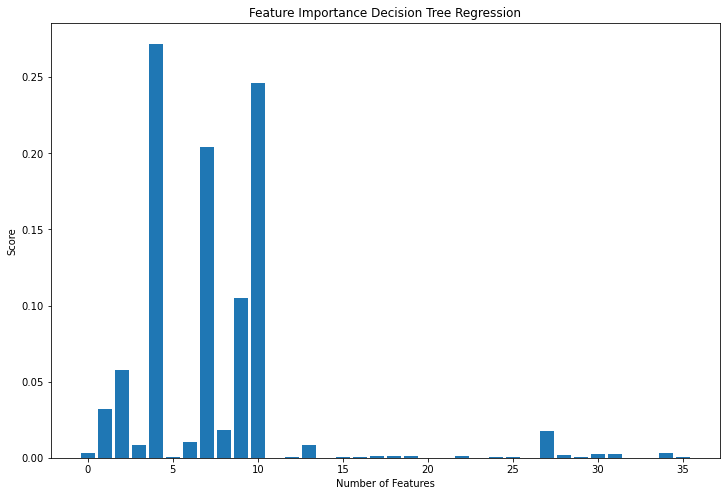

In [78]:

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=36, n_informative=5, random_state=1)
# define the model
#model = DecisionTreeRegressor()
# fit the model
#model.fit(X, y)
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Number of Features') 
plt.ylabel('Score') 
plt.title('Feature Importance Decision Tree Regression')
plt.show()